In [1]:
# Importación de paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [2]:
url = "threads_reviews.csv"
dataset = pd.read_csv(url, sep = ",")
dataset['Sentimiento'] = ''
dataset['Polaridad'] = 0.0
dataset.head()

,source,review_description,rating,review_date,Sentimiento,Polaridad
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,,0.0
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,,0.0
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,,0.0
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,,0.0
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,,0.0


### Analisis descriptivo

In [3]:
# Análisis descriptivo de las variables
source_counts = dataset['source'].value_counts()
average_description_length = dataset['review_description'].str.len().mean()
rating_summary = dataset['rating'].describe()
earliest_review_date = dataset['review_date'].min()
latest_review_date = dataset['review_date'].max()

In [4]:
# Imprimir los resultados
print("Conteo de categorías en la variable 'source':")
print(source_counts)

print("\nLongitud promedio de descripciones de reseñas:")
print(average_description_length)

print("\nResumen estadístico de la variable 'rating':")
print(rating_summary)

print("\nFecha más temprana de revisión:")
print(earliest_review_date)

print("\nFecha más reciente de revisión:")
print(latest_review_date)

Conteo de categorías en la variable 'source':
Google Play    30270
App Store       2640
Name: source, dtype: int64

Longitud promedio de descripciones de reseñas:
65.73491340018232

Resumen estadístico de la variable 'rating':
count    32910.000000
mean         3.398481
std          1.751480
min          1.000000
25%          1.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

Fecha más temprana de revisión:
2023-07-05 22:53:12

Fecha más reciente de revisión:
2023-07-25 09:42:20


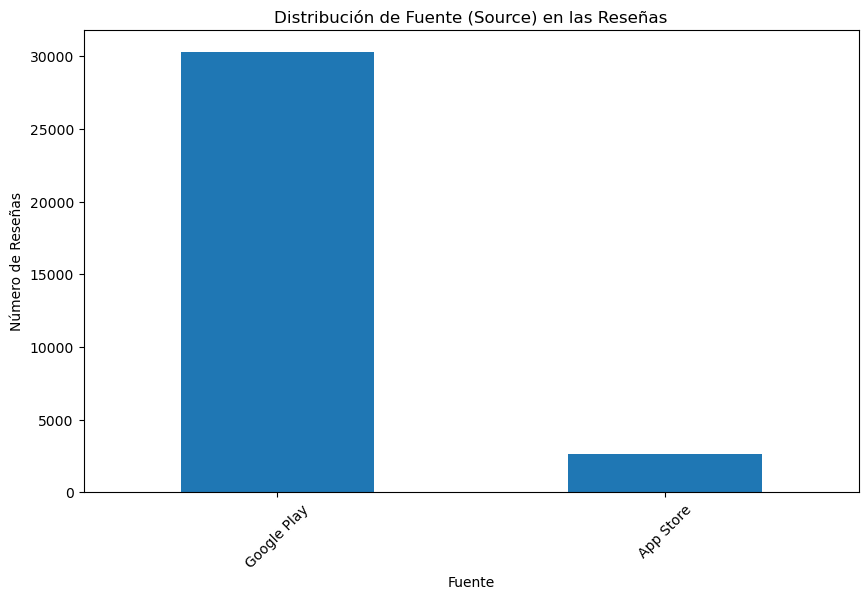

In [5]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar')
plt.title("Distribución de Fuente (Source) en las Reseñas")
plt.xlabel("Fuente")
plt.ylabel("Número de Reseñas")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Mostrar el gráfico
plt.show()

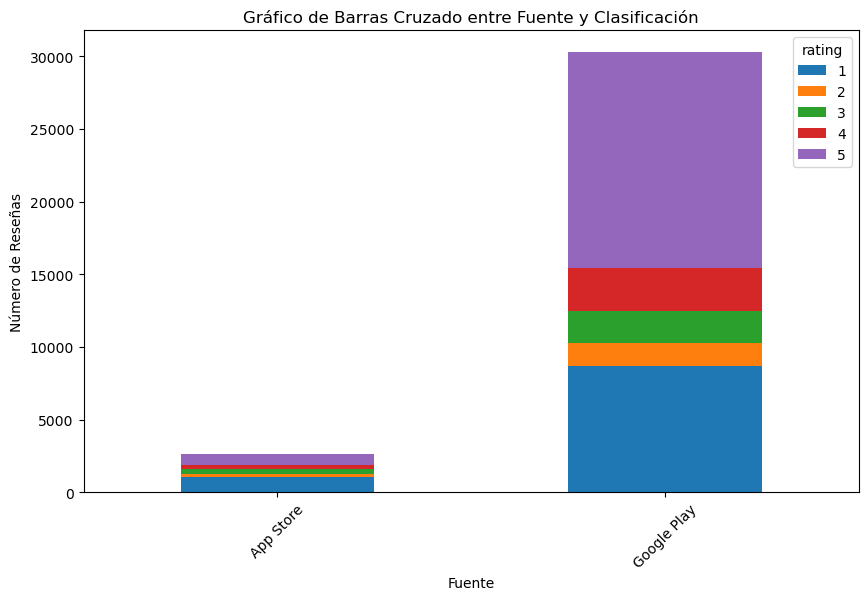

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado "df" que contiene tus datos.

# Utiliza crosstab para crear una tabla cruzada
cross_table = pd.crosstab(dataset['source'], dataset['rating'])

# Luego, puedes crear un gráfico de barras a partir de la tabla cruzada
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title("Gráfico de Barras Cruzado entre Fuente y Clasificación")
plt.xlabel("Fuente")
plt.ylabel("Número de Reseñas")
plt.xticks(rotation=45)

# Muestra el gráfico
plt.show()



In [10]:
# pip install textstat

     ------------------------------------ 105.1/105.1 kB 759.0 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from textstat import flesch_reading_ease, smog_index, coleman_liau_index

# Supongamos que tienes un DataFrame llamado 'df' con una columna 'review_description'

# Calcular la legibilidad utilizando la métrica Flesch Reading Ease
dataset['flesch_reading_ease'] = dataset['review_description'].apply(flesch_reading_ease)

# Calcular la legibilidad utilizando la métrica SMOG Index
dataset['smog_index'] = dataset['review_description'].apply(smog_index)

# Calcular la legibilidad utilizando la métrica Coleman-Liau Index
dataset['coleman_liau_index'] = dataset['review_description'].apply(coleman_liau_index)

# Ahora 'df' contiene columnas adicionales con las estadísticas de legibilidad


In [17]:
dataset.head()

,source,review_description,rating,review_date,Sentimiento,Polaridad,flesch_reading_ease,smog_index,coleman_liau_index
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,,0.0,74.39,8.8,8.00
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,,0.0,52.53,14.6,10.16
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,,0.0,83.66,7.4,6.83
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,,0.0,80.92,9.3,5.80
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,,0.0,72.36,8.8,7.07


In [15]:
# Calcula el resumen estadístico
summary = dataset[['flesch_reading_ease', 'smog_index', 'coleman_liau_index']].describe()

# Imprime el resumen estadístico
print(summary)

       flesch_reading_ease    smog_index  coleman_liau_index
count         32910.000000  32910.000000        32910.000000
mean             88.031304      0.797387           -0.071128
std              41.134309      2.513938           11.154391
min            -786.040000      0.000000          -39.610000
25%              70.500000      0.000000           -5.810000
50%              88.740000      0.000000            3.350000
75%             119.190000      0.000000            7.250000
max             206.840000     16.900000          200.630000


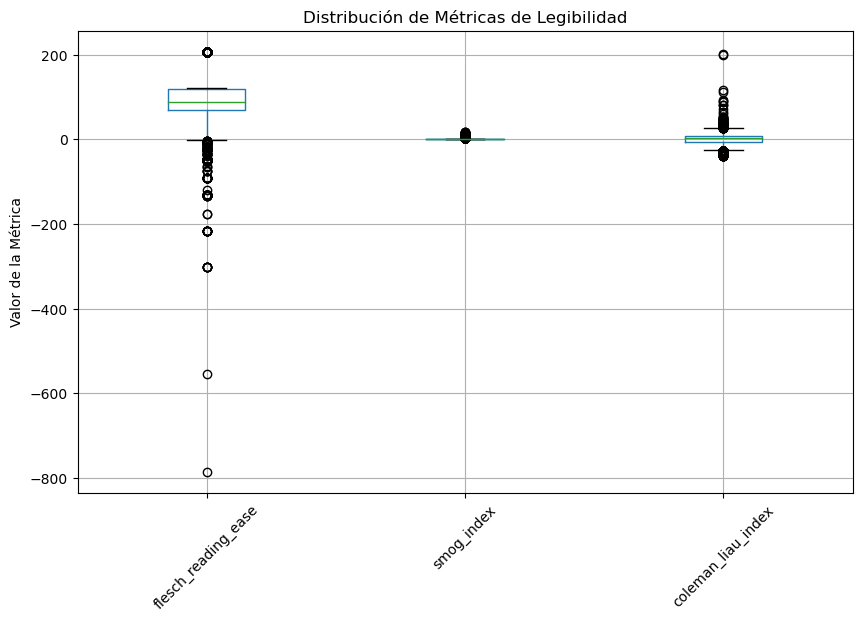

In [16]:
# Supongamos que tienes un DataFrame llamado 'df' que contiene tus datos
# Puedes seleccionar las columnas relevantes para las métricas de legibilidad
legibility_metrics = dataset[['flesch_reading_ease', 'smog_index', 'coleman_liau_index']]

# Crear un gráfico de cajas para visualizar la distribución de las métricas
plt.figure(figsize=(10, 6))
legibility_metrics.boxplot()
plt.title("Distribución de Métricas de Legibilidad")
plt.ylabel("Valor de la Métrica")
plt.xticks(rotation=45)
plt.show()


---

In [3]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
tweets  = dataset.review_description

In [5]:
# Realizar análisis de sentimientos y guardar los resultados en el conjunto de datos
for index, row in dataset.iterrows():
    tweet = row['review_description']
    resultados = sia.polarity_scores(tweet)
    polaridad = resultados['compound']
    
    if polaridad > 0.05:
        sentimiento = "positivo"
    elif polaridad < -0.05:
        sentimiento = "negativo"
    else:
        sentimiento = "neutral"
    
    dataset.at[index, 'Sentimiento'] = sentimiento
    dataset.at[index, 'Polaridad'] = polaridad


In [6]:
dataset.head()

,source,review_description,rating,review_date,Sentimiento,Polaridad
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,negativo,-0.7117
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,positivo,0.9899
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,positivo,0.9076
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,positivo,0.4114
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,positivo,0.8860


In [7]:
columna_x = dataset.rating
columna_y = dataset.Sentimiento

tabla_cruzada =  pd.crosstab(columna_x, columna_y)

# Mostrar la tabla cruzada
print(tabla_cruzada)

Sentimiento  negativo  neutral  positivo
rating                                  
1                3760     3981      1985
2                 530      558       708
3                 469      757      1359
4                 220      781      2243
5                 470     4495     10594


In [8]:
# Hacer un analisis descriptivo

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [9]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = dataset['review_description']
y = dataset['Sentimiento']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Crear un vectorizador TF-IDF
# Probar otro embeding: 
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [28]:
# Probar modelos individuales, con lo diferentes embeding.

In [11]:
# Crear modelos individuales
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

In [12]:
# Entrenar el modelo Random Forest
random_forest.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_rf = random_forest.predict(X_test_tfidf)

# Evaluar el rendimiento del modelo Random Forest
accuracy_rf = accuracy_score(y_test, predictions_rf)
classification_rep_rf = classification_report(y_test, predictions_rf)

print("Exactitud Random Forest:", accuracy_rf)
print("Reporte de Clasificación Random Forest:\n", classification_rep_rf)


Exactitud Random Forest: 0.8529322394408995
Reporte de Clasificación Random Forest:
               precision    recall  f1-score   support

    negativo       0.82      0.55      0.66      1084
     neutral       0.85      0.88      0.86      2133
    positivo       0.86      0.94      0.90      3365

    accuracy                           0.85      6582
   macro avg       0.84      0.79      0.81      6582
weighted avg       0.85      0.85      0.85      6582



In [13]:
# Entrenar el modelo de Regresión Logística
logistic_regression.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_lr = logistic_regression.predict(X_test_tfidf)

# Evaluar el rendimiento del modelo de Regresión Logística
accuracy_lr = accuracy_score(y_test, predictions_lr)
classification_rep_lr = classification_report(y_test, predictions_lr)

print("Exactitud Regresión Logística:", accuracy_lr)
print("Reporte de Clasificación Regresión Logística:\n", classification_rep_lr)


Exactitud Regresión Logística: 0.8708599209966575
Reporte de Clasificación Regresión Logística:
               precision    recall  f1-score   support

    negativo       0.77      0.64      0.70      1084
     neutral       0.86      0.91      0.88      2133
    positivo       0.91      0.92      0.91      3365

    accuracy                           0.87      6582
   macro avg       0.84      0.82      0.83      6582
weighted avg       0.87      0.87      0.87      6582



In [30]:
# Crear el ensamblaje (Voting Classifier)
ensemble = VotingClassifier(estimators=[('rf', random_forest), ('lr', logistic_regression)], voting='soft')


In [31]:
# Entrenar el modelo ensamblado
ensemble.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42))],
                 voting='soft')

In [32]:
# Realizar predicciones en el conjunto de prueba
predictions = ensemble.predict(X_test_tfidf)

In [33]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Exactitud:", accuracy)
print("Reporte de Clasificación:\n", classification_rep)

Exactitud: 0.8746581586144029
Reporte de Clasificación:
               precision    recall  f1-score   support

    negativo       0.81      0.63      0.71      1084
     neutral       0.86      0.90      0.88      2133
    positivo       0.90      0.93      0.92      3365

    accuracy                           0.87      6582
   macro avg       0.86      0.82      0.84      6582
weighted avg       0.87      0.87      0.87      6582



In [34]:
X_test

23143                                               Glitch
1337     Display rendering issue where text overlays on...
25039                                                   😌❤
7726     Worst, Just copy and paste instagram code to t...
18505                                                  ممل
                               ...                        
22960                                               BORING
20371                                             Best app
13687                                   Kit cat copy paste
21816                                                 Good
18195                                     the app is osm 🙏
Name: review_description, Length: 6582, dtype: object

In [37]:
# Supongamos que tienes dos arrays
array1 = X_test
array2 = predictions

# Crear un DataFrame a partir de los arrays
data = {'Columna1': array1, 'Columna2': array2}
df = pd.DataFrame(data)

# Mostrar el dataset resultante
print(df)

                                                Columna1  Columna2
23143                                             Glitch   neutral
1337   Display rendering issue where text overlays on...  positivo
25039                                                 😌❤   neutral
7726   Worst, Just copy and paste instagram code to t...  negativo
18505                                                ممل   neutral
...                                                  ...       ...
22960                                             BORING  negativo
20371                                           Best app  positivo
13687                                 Kit cat copy paste   neutral
21816                                               Good  positivo
18195                                   the app is osm 🙏   neutral

[6582 rows x 2 columns]


### Analisis descriptivo

In [1]:
url = "comentarios_telecomunicaciones.csv"
df = pd.read_csv(url, sep = ",")
df['Sentimiento'] = ''
df['Polaridad'] = 0.0

NameError: name 'pd' is not defined

In [11]:
# Realizar un análisis descriptivo de las variables
# Puedes repetir los pasos anteriores para cada variable, como Fecha, Producto y Comentario

# Ejemplo de análisis de la variable "Fecha"
fecha_min = df['Fecha'].min()
fecha_max = df['Fecha'].max()

# Ejemplo de análisis de la variable "Producto"
productos_count = df['Producto'].value_counts()

# Ejemplo de análisis de la variable "Comentario"
longitud_promedio = df['Comentario'].apply(len).mean()

# Imprimir los resultados
print("Resumen estadístico de la variable 'Fecha':")
print("Fecha más temprana:", fecha_min)
print("Fecha más reciente:", fecha_max)

print("\nConteo de categorías en la variable 'Producto':")
print(productos_count)

print("\nLongitud promedio de los comentarios:")
print(longitud_promedio)

Resumen estadístico de la variable 'Fecha':
Fecha más temprana: 2022-10-18 09:43:33
Fecha más reciente: 2023-10-16 04:22:08

Conteo de categorías en la variable 'Producto':
Fibra Óptica            47
Telefonía Móvil         36
Internet                35
Televisión por Cable    32
Name: Producto, dtype: int64

Longitud promedio de los comentarios:
94.48


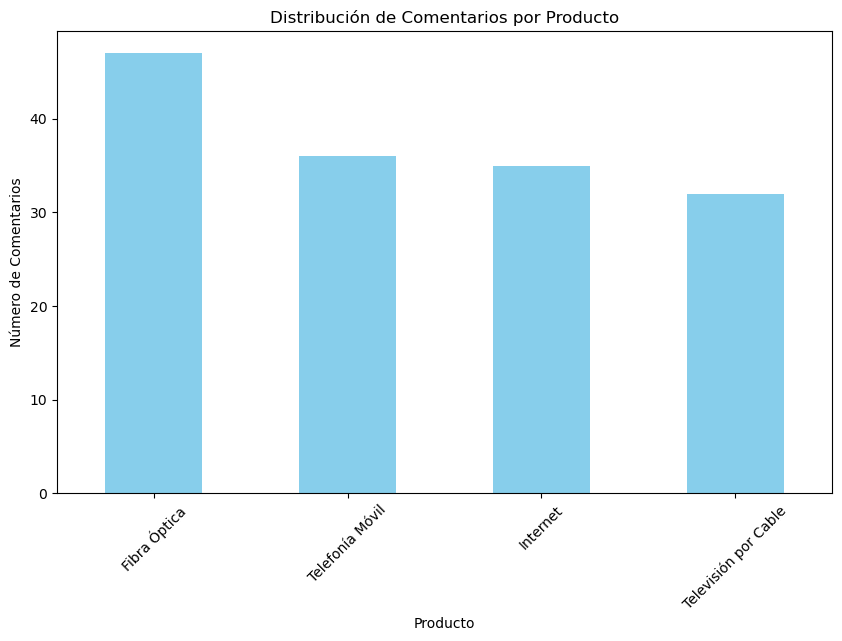

In [12]:
# Calcular el conteo de categorías en la variable 'Producto'
productos_count = df['Producto'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
productos_count.plot(kind='bar', color='skyblue')
plt.title("Distribución de Comentarios por Producto")
plt.xlabel("Producto")
plt.ylabel("Número de Comentarios")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Mostrar el gráfico
plt.show()

In [20]:
from textstat import flesch_reading_ease, smog_index, coleman_liau_index

# Supongamos que tienes un DataFrame llamado 'df' con una columna 'review_description'

# Calcular la legibilidad utilizando la métrica Flesch Reading Ease
df['flesch_reading_ease'] = df['Comentario'].apply(flesch_reading_ease)

# Calcular la legibilidad utilizando la métrica SMOG Index
df['smog_index'] = df['Comentario'].apply(smog_index)

# Calcular la legibilidad utilizando la métrica Coleman-Liau Index
df['coleman_liau_index'] = df['Comentario'].apply(coleman_liau_index)

,Fecha,Producto,Comentario,Sentimiento,Polaridad,flesch_reading_ease,smog_index,coleman_liau_index
0,2023-10-16 00:07:53,Internet,Public three former pull design. Officer sport...,,0.0,48.77,9.7,12.28
1,2023-04-05 12:41:01,Fibra Óptica,Majority this oil who increase information. Cu...,,0.0,65.08,7.8,9.97
2,2023-09-26 17:53:40,Fibra Óptica,Fact by baby suggest. Degree wait field situat...,,0.0,58.24,7.8,9.48
3,2023-09-03 18:53:07,Televisión por Cable,Likely sea there notice prevent ready maybe. D...,,0.0,47.45,9.7,14.57
4,2022-10-25 16:46:51,Telefonía Móvil,As whatever bring economy. Night more across c...,,0.0,74.86,0.0,6.70


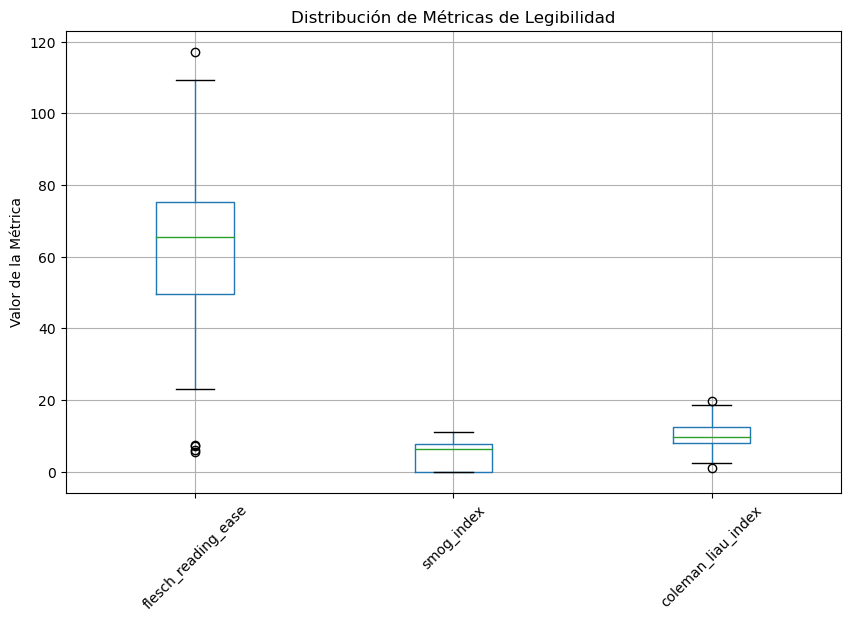

In [21]:
# Supongamos que tienes un DataFrame llamado 'df' que contiene tus datos
# Puedes seleccionar las columnas relevantes para las métricas de legibilidad
legibility_metrics = df[['flesch_reading_ease', 'smog_index', 'coleman_liau_index']]

# Crear un gráfico de cajas para visualizar la distribución de las métricas
plt.figure(figsize=(10, 6))
legibility_metrics.boxplot()
plt.title("Distribución de Métricas de Legibilidad")
plt.ylabel("Valor de la Métrica")
plt.xticks(rotation=45)
plt.show()


In [23]:
# Calcula el resumen estadístico
summary = df[['flesch_reading_ease', 'smog_index', 'coleman_liau_index']].describe()

# Imprime el resumen estadístico
print(summary)

       flesch_reading_ease  smog_index  coleman_liau_index
count           150.000000  150.000000          150.000000
mean             64.001333    4.432667           10.189267
std              20.721307    4.037600            3.446498
min               5.660000    0.000000            1.060000
25%              49.530000    0.000000            7.920000
50%              65.390000    6.400000            9.835000
75%              75.160000    7.800000           12.440000
max             117.160000   11.200000           19.770000


In [44]:
tweets  = df.Comentario

In [45]:
# Realizar análisis de sentimientos y guardar los resultados en el conjunto de datos
for index, row in df.iterrows():
    tweet = row['Comentario']
    resultados = sia.polarity_scores(tweet)
    polaridad = resultados['compound']
    
    if polaridad > 0.05:
        sentimiento = "positivo"
    elif polaridad < -0.05:
        sentimiento = "negativo"
    else:
        sentimiento = "neutral"
    
    df.at[index, 'Sentimiento'] = sentimiento
    df.at[index, 'Polaridad'] = polaridad

In [24]:
columna_x = df.Producto
columna_y = df.Sentimiento

tabla_cruzada =  pd.crosstab(columna_x, columna_y)

# Mostrar la tabla cruzada
print(tabla_cruzada)

Sentimiento           negativo  neutral  positivo
Producto                                         
Fibra Óptica                11       12        24
Internet                     8        9        18
Telefonía Móvil              7        7        22
Televisión por Cable        13        6        13


In [47]:
X_test = df['Comentario']
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [48]:
# Realizar predicciones en el conjunto de prueba
predictions = ensemble.predict(X_test_tfidf)

In [50]:
# Evaluar el rendimiento del modelo
y_test = df['Sentimiento']
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Exactitud:", accuracy)
print("Reporte de Clasificación:\n", classification_rep)

Exactitud: 0.6133333333333333
Reporte de Clasificación:
               precision    recall  f1-score   support

    negativo       0.85      0.28      0.42        39
     neutral       0.39      0.94      0.55        34
    positivo       0.89      0.64      0.74        77

    accuracy                           0.61       150
   macro avg       0.71      0.62      0.57       150
weighted avg       0.77      0.61      0.62       150

